# Mini-Projet :  Détection de sons de Beatbox

## Nom du binôme : L'MOUDDEN Hiba / KASMI Mohamed amine

L'objectif de ce TP consiste à détecter et reconnaître les différents sons de beatbox à partir de fichiers sonores au format *.wav* via l'analyse cepstrale.


<img src="Sons_Beatbox.png" width="800">



Vous disposez d'une base d'enregistrements de beatbox. Il faut reconnaître les 12 sons beatbox suivants :

$$\text{'cymbale_expiree', 'cymbale_inspiree', 'hihat_humming', 'hihat_power ferme', 'hihat_power ouvert', 'kick_humming', }$$
$$\text{'kick_power','rimshot_humming', 'rimshot_power', 'snare_humming', 'snare_power', 'snare_power inverse'}$$


**Source :** https://pubs.aip.org/asa/jasa/article/149/1/191/610401 \
Paroni, Annalisa, et al. *Vocal drum sounds in human beatboxing: An acoustic and articulatory exploration using electromagnetic articulography.* The Journal of the Acoustical Society of America 149.1 (2021): 191-206.


In [6]:
from IPython.display import Image

import matplotlib.pyplot as plt
import numpy as np
import scipy
import sklearn
import math
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

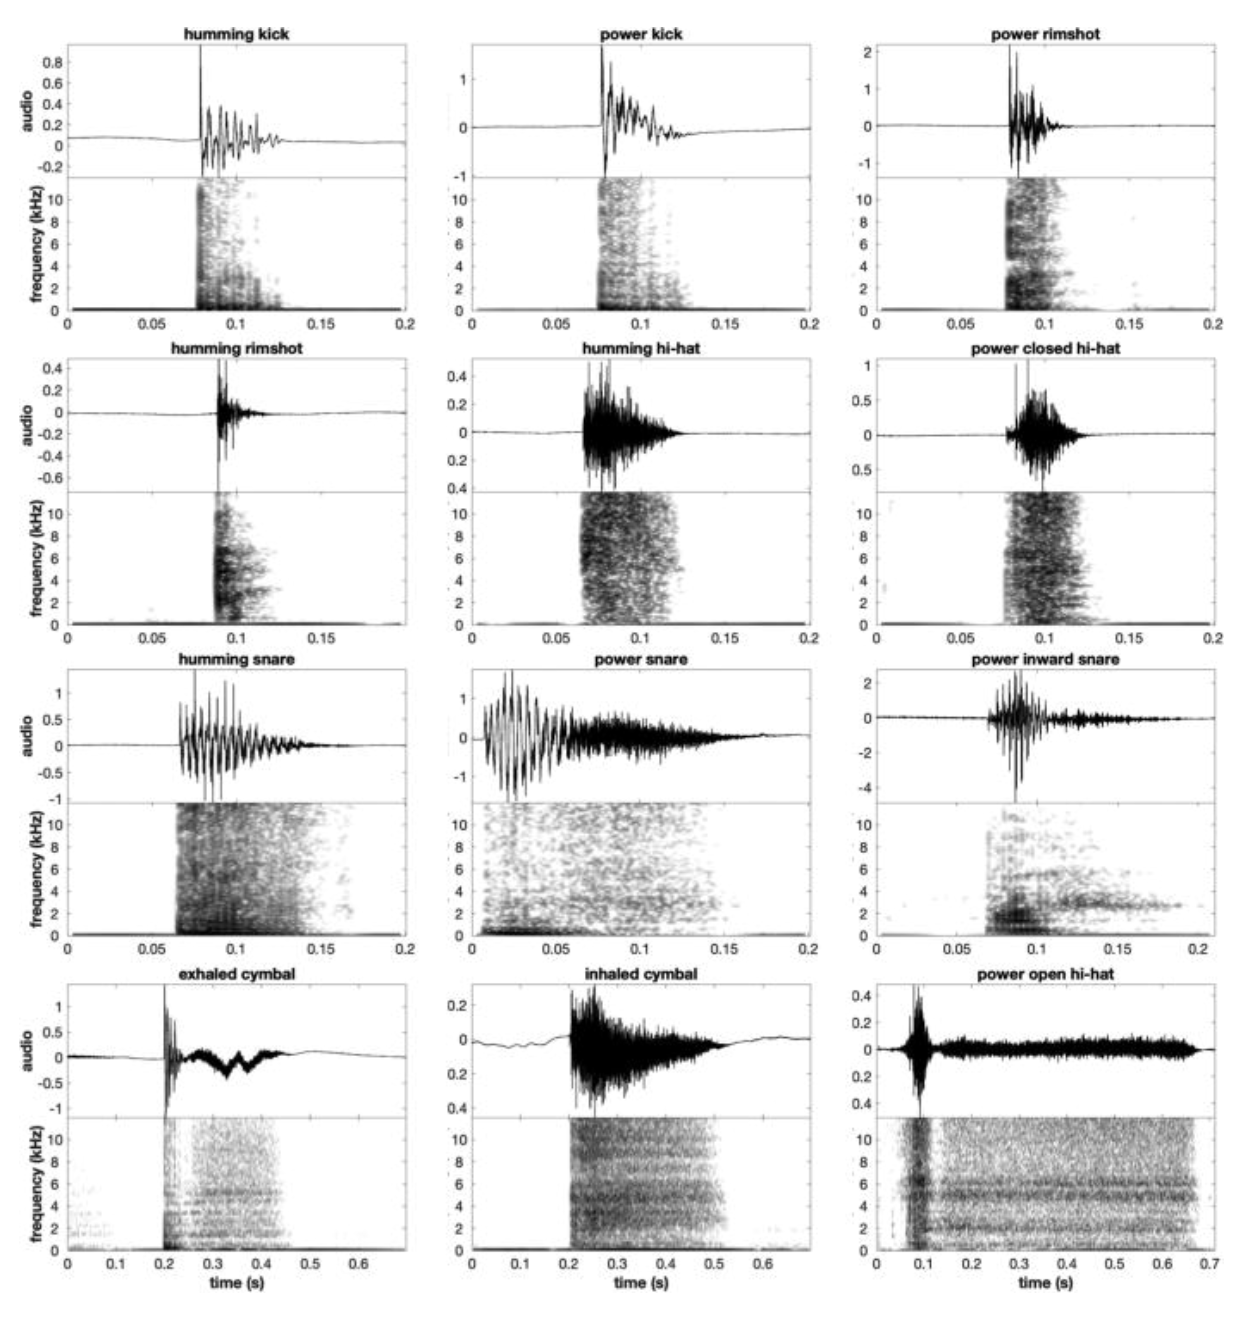

In [7]:
Image("Sons_Beatbox.png")

# Chargement des données


Le fichier source sur lequel vous travaillez est la conversion des enregistrements audio en matrice de paramètres appélés MFCC (Mel Frequency Cepstral Coefficient) en utilisant la librairie python *librosa*. Ces paramètres permettent d'extraire au mieux le contenu vocal fréquenciel du signal audio.

La matrice de données est composée d'autant de vecteurs lignes que de fichiers audio. Le nombre de colonnes correspond à la dimension du vecteur moyen représentatif des MFCC : ici 13.

In [9]:
# Chargement des données à partir d'un fichier matlab .mat
import scipy.io as sio
test = sio.loadmat('2016HBXX_effets_mfcc_nodeltas_XY_nozcaPerFile_zcaX.mat')


# data = matrice des données : nombre d'enregistrements x 13 coefficients
data=test['X']
data=np.array(data)
data=data.astype('float64')
print('Dimension de la matrice des MFCC :',data.shape)

# label = Numéro correspondant à un son de beatbox associé à chaque enregistrement
label=test['Y']
label=np.ravel(label)
print('Dimension des labels', label.shape)

# liste des sons de beatbox
Nomlabel=['cymbale_expiree', 'cymbale_inspiree', 'hihat_humming', 'hihat_power ferme', 'hihat_power ouvert', 'kick_humming','kick_power','rimshot_humming', 'rimshot_power', 'snare_humming', 'snare_power', 'snare_power inverse']



Dimension de la matrice des MFCC : (341, 13)
Dimension des labels (341,)


In [10]:
# Description du jeu de données
unique, counts = np.unique(label, return_counts=True)


for i in range(unique.shape[0]):
    print('Label',unique[i],'correspond à ',Nomlabel[i],':',counts[i],'enregistrements');

Label 0 correspond à  cymbale_expiree : 28 enregistrements
Label 1 correspond à  cymbale_inspiree : 18 enregistrements
Label 2 correspond à  hihat_humming : 37 enregistrements
Label 3 correspond à  hihat_power ferme : 20 enregistrements
Label 4 correspond à  hihat_power ouvert : 24 enregistrements
Label 5 correspond à  kick_humming : 37 enregistrements
Label 6 correspond à  kick_power : 42 enregistrements
Label 7 correspond à  rimshot_humming : 25 enregistrements
Label 8 correspond à  rimshot_power : 38 enregistrements
Label 9 correspond à  snare_humming : 30 enregistrements
Label 10 correspond à  snare_power : 22 enregistrements
Label 11 correspond à  snare_power inverse : 20 enregistrements


###  Découpage de l'ensemble de données en Apprentissage et test pour les approches supevisée.

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.33, random_state=42)

### Fonctions pour réaliser une table de correspondance entre le label des approches non supervisées et le label réel

In [12]:
def retrieve_info(cluster_labels,y_train):
 #Associe l'étiquette la plus probable à chaque groupe dans le modèle KMeans.
 #Résultats : dictionnaire des clusters associés à chaque étiquette.

# Initialisation
  reference_labels = np.zeros((len(np.unique(cluster_labels)),1))
# Loop pour chaque label
  for i in range(len(np.unique(cluster_labels))):
    index = np.where(cluster_labels == i,1,0)
    num = np.bincount(y_train[index==1]).argmax()
    reference_labels[i] = num
  return reference_labels

def correspondance(y_pred_kmeans,y_train):
  # Correspondance entre la partition et les classes de la vérité terrain
  reference_labels = retrieve_info(y_pred_kmeans,y_train)
  number_labels = np.zeros(len(y_pred_kmeans))
  for i in range(len(y_pred_kmeans)):
    number_labels[i] = reference_labels[y_pred_kmeans[i]]
  return number_labels


# Partie I : Classification des sons beatbox sans prétraitement

Réaliser une classification de ces sons de beatbox par une méthode d'apprentissage supervisé et une méthode d'apprentissage non supervisé de votre choix en utilisant soit les codes des TP précédents, soit en utilisant la librairie *scikit-learn*.

Pour chaque résultat obtenu, calculer la matrice de confusion et utiliser l'image des signaux présenté ci-dessus pour interpréter les résultats.

## Méthode supervisée  :
indiquer quelle est la méthode supervisée de votre choix et calculer la matrice de confusion associée (confusion_matrix) et le score de performance (accuracy_score)

In [13]:
from sklearn.neighbors import KNeighborsClassifier


In [14]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(y_pred)

[11  4  4  1  4  7  6  6 11  1  4  7  8  8  4  5  4  5  5  0  6  2 10  4
  5  3  4  6  5 10  6  1  4  8  2  0  7 11  4  2  3  0  6  7  2  6  9  8
  2  1  8  6  8  3  2  6  2 11 10  1  9 10 10  8  6  2  2  0  2  4  0  5
 11 10 10  2  2  7  8  2  3  8  3  8  5  0  1  9  6  9 10 11  9  8  9  7
  0  6  2 10  0  5  5  1 10  2  6 10 11  5  2  4  5]


In [15]:

# Choix du nombre de voisins
k=10
# Nombre de données à tester
Nt=X_test.shape[0]
#Nt_test = int(Nt/10); # A changer, pouvant aller jusqu'a Nt

# Affichage des résultats de prédiction et de vérité terrainMatriceConfusion=np.zeros((10,10))
print('Resultat Kppv',y_pred)
print('Vérité terrain',y_test)

# Calcul de la matrice de confusion
confusion = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion
print(confusion)

# Calcul de la précision
accuracy = accuracy_score(y_pred, y_test)

# Affichage de la précision
print("Précision :", accuracy)

Resultat Kppv [11  4  4  1  4  7  6  6 11  1  4  7  8  8  4  5  4  5  5  0  6  2 10  4
  5  3  4  6  5 10  6  1  4  8  2  0  7 11  4  2  3  0  6  7  2  6  9  8
  2  1  8  6  8  3  2  6  2 11 10  1  9 10 10  8  6  2  2  0  2  4  0  5
 11 10 10  2  2  7  8  2  3  8  3  8  5  0  1  9  6  9 10 11  9  8  9  7
  0  6  2 10  0  5  5  1 10  2  6 10 11  5  2  4  5]
Vérité terrain [11  4  4  0  4  7  6  6 11  1  4  7  8  8  4  5  4  5  5  0  6  2 10  4
  5  3  4  6  5 10  6  1  4  8  2  0  7 11  4  2  3  0  6  7  2  6  9  8
  2  1  8  6  8  3  2  6  2 11 11  1  9 10 10  8  6  2  2  0  2  4  0  5
 11 10 10  2  7  7  8  2  3  8  3  8  5  0  1  9  5  9 10 11  9  8  5  7
  0  6  2 10  0  5  9  1 10  7  6  8 11  5  2  4  5]
[[ 8  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 14  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  5  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 12  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 10  1  0  0  1  0  0]
 [ 0  0  0  0  0  0 12  0  0  0  0  0]
 [ 0  0 

## Méthode non supervisée
Indiquer quelle est la méthode non supervisée de votre choix et calculer la matrice de confusion associée (confusion_matrix) et le score de performance (accuracy_score)

In [17]:
from sklearn.cluster import KMeans

# Créez un modèle k-means avec un certain nombre de clusters (k)
kmeans = KMeans(n_clusters=12)
# Entraînez le modèle sur vos données
kmeans.fit_predict(data)
# Obtenez les étiquettes de cluster pour chaque point de données
labels = kmeans.labels_

l = correspondance(labels, label)
print(l)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  9.  2. 10.  2.  2.  2. 10.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  7.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  3.  3.  3.  4.  3.  3.  3.  3.
  3.  3.  0.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  4.  4.  4.  4.  4.
  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.
  4.  9.  5.  9.  5.  5.  9.  9.  5.  5.  9.  9.  5.  5.  5.  9.  5.  9.
  5.  5.  5.  5.  5.  5.  5.  5.  5.  9.  5.  5.  5.  5.  9.  9.  5.  5.
  5.  9.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.
  6.  6.  6.  5.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.
  6.  6.  6.  6.  6.  6.  6.  6.  7.  7.  7.  7.  7.  7.  4.  7.  7.  7.
  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  0.  8.  8.
 10.  0.  8.  8.  8.  8.  8.  0.  0.  8.  8.  8.  8

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [18]:
confusion = confusion_matrix(label, l)
print(confusion)

accuracy = accuracy_score(l, label)
print("Précision :", accuracy)

[[24  4  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 32  1  0  0  0  1  0  1  2  0]
 [ 1  0  0 18  1  0  0  0  0  0  0  0]
 [ 0  0  0  0 24  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 25  0  0  0 12  0  0]
 [ 0  0  0  0  0  1 41  0  0  0  0  0]
 [ 0  0  0  0  1  0  0 24  0  0  0  0]
 [ 4  0  0  0  0  0  0  0 33  0  1  0]
 [ 0  0  0  0  0  5  1  2  0 22  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 22  0]
 [ 0  0  0  0  0  0  0  1  0  0  0 19]]
Précision : 0.8856304985337243


# Partie II : Classification des sons beatbox avec prétraitement


## Méthode supervisée avec réduction de dimension par ACP sur l'ensemble d'apprentissage
Réaliser une ACP sur l'ensemble d'apprentissage pour réduire la dimension, visualiser les données
puis projeter les données de l'ensemble de test dans la base de l'ACP.

Indiquer quelle est la méthode supervisée de votre choix et calculer la matrice de confusion associée (confusion_matrix) et le score de performance (accuracy_score)

In [26]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
# Créez un objet PCA
pca = PCA(n_components=5)

# Entraînez l'ACP sur les données d'entraînement et transformez-les
X_train_pca = pca.fit_transform(X_train)

# Appliquez la transformation ACP aux données de test
X_test_pca = pca.transform(X_test)

In [27]:
from sklearn.svm import SVC
# Créez un modèle SVM
svm_classifier = SVC()

# Entraînez le modèle SVM sur les données d'apprentissage réduites en dimension
svm_classifier.fit(X_train_pca, y_train)

# Prédisez les étiquettes sur les données de test réduites en dimension
y_pred_svm = svm_classifier.predict(X_test_pca)

# Calculez la matrice de confusion
confusion = confusion_matrix(y_test, y_pred_svm)

# Calculez le score de performance (exactitude)
accuracy = accuracy_score(y_test, y_pred_svm)

print("Matrice de confusion de la classification supervisée avec ACP :\n", confusion)
print("Score de performance : {:.2f}".format(accuracy))

Matrice de confusion de la classification supervisée avec ACP :
 [[ 7  1  0  0  0  0  0  0  1  0  0  0]
 [ 0  6  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 14  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  2  0  0  0  0  0  1  0]
 [ 0  0  0  1 11  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 10  2  0  0  0  0  0]
 [ 0  0  0  0  0  0 12  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  5  0  0  0  1]
 [ 1  0  0  0  0  0  0  0 11  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  5  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  9  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  6]]
Score de performance : 0.87



## Méthode non supervisée avec réduction de dimension par ACP sur l'ensemble des données

Réaliser une ACP sur l'ensemble des données et indiquer quelle est la méthode supervisée de votre choix et calculer la matrice de confusion associée (confusion_matrix) et le score de performance (accuracy_score)

In [34]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score


# Créez un objet PCA
pca = PCA(n_components=5)

In [37]:
# Créez un modèle K-Means avec le nombre de clusters égal au nombre de classes de sons de beatbox
n_clusters = len(np.unique(label))
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
data_pca = pca.fit_transform(data)
# Entraînez le modèle K-Means sur les données ACP
kmeans.fit(data_pca)

# Obtenez les clusters prédits
y_pred_kmeans = kmeans.predict(data_pca)

number_labels_kmeans = correspondance(y_pred_kmeans, label)

In [38]:
# Calculez la matrice de confusion
confusion_kmeans = confusion_matrix(label, number_labels_kmeans)

# Calculez le score de performance (exactitude)
accuracy_kmeans = accuracy_score(label, number_labels_kmeans)

print("Matrice de confusion du K-Means sur les données ACP :\n", confusion_kmeans)
print("Score de performance (exactitude) du K-Means sur les données ACP : {:.2f}".format(accuracy_kmeans))

Matrice de confusion du K-Means sur les données ACP :
 [[22  4  0  0  0  0  0  0  0  0  2  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 36  0  1  0  0  0  0  0  0  0]
 [ 0  0  1  0 18  0  0  1  0  0  0  0]
 [ 0  0  0  0 24  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 18 19  0  0  0  0  0]
 [ 0  0  0  0  0  0 42  0  0  0  0  0]
 [ 0  3  3  0  0  0  0 16  0  0  2  1]
 [ 7  0  0  0  0  0  0  0 31  0  0  0]
 [ 5  0  0  0  0  1 22  0  0  0  2  0]
 [ 2  0  0  0  0  0  0  0  0  0 20  0]
 [ 0  0  0  0  0  0  0  2  0  0  0 18]]
Score de performance (exactitude) du K-Means sur les données ACP : 0.72


# Partie III : Votre analyse


Pour chaque résultat obtenu, calculer la matrice de confusion et utiliser l'article et les signaux présentés ci-dessus pour interpréter les résultats.

Un rapport de maximum 10 pages sera à rendre avec le notebook des codes ayant donné ces résultats.